### importer les bibliothéque 

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

### importer le dataset

In [21]:
df_winquality_red = pd.read_csv("../data/winequality-red.csv", sep=";")
df_winquality_white = pd.read_csv("../data/winequality-white.csv", sep=";")

df_winquality_red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df_winquality_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
df_winquality_white_quality = pd.concat([df_winquality_white, df_winquality_red], axis=0)
df_winquality_white_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Analyse du dataframe

In [24]:
print("ligne_colonnees :  ", df_winquality_white_quality.shape ,"size : ", df_winquality_white_quality.size , "dimension : ", df_winquality_white_quality.ndim)

ligne_colonnees :   (6497, 12) size :  77964 dimension :  2


In [25]:
df_winquality_white_quality.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

- fixed acidity : 	acidité fixe
- volatile acidity : 	acidité volatile
- citric acid : 	acide citrique
- residual sugar	: sucre résiduel
- chlorides : 	chlorures
- free sulfur dioxide : 	dioxyde de soufre libre
- total sulfur dioxide :	dioxyde de soufre total
- density	: densité
- pH	: pH
- sulphates : 	sulfates
- alcohol	: alcool
- quality	: qualité

In [26]:
df_winquality_white_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [27]:
df_winquality_white_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality'>

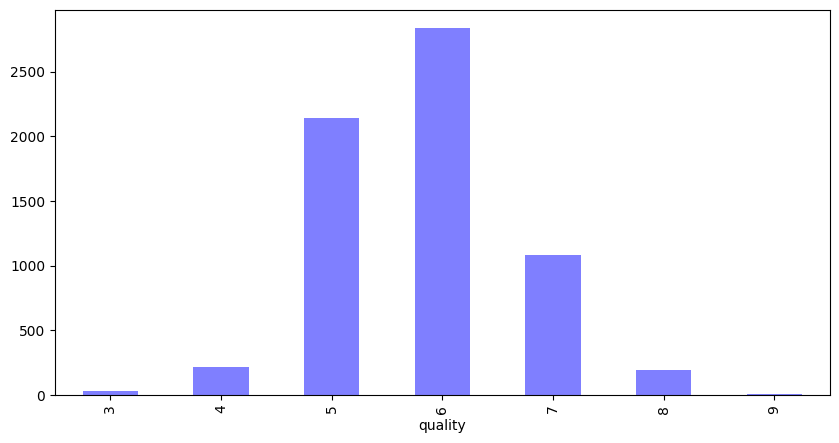

In [28]:
df_winquality_white_quality["quality"].value_counts().sort_index().plot(kind="bar", color="blue", alpha=0.5, figsize=(10, 5))

In [29]:
df_winquality_white_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<Axes: >

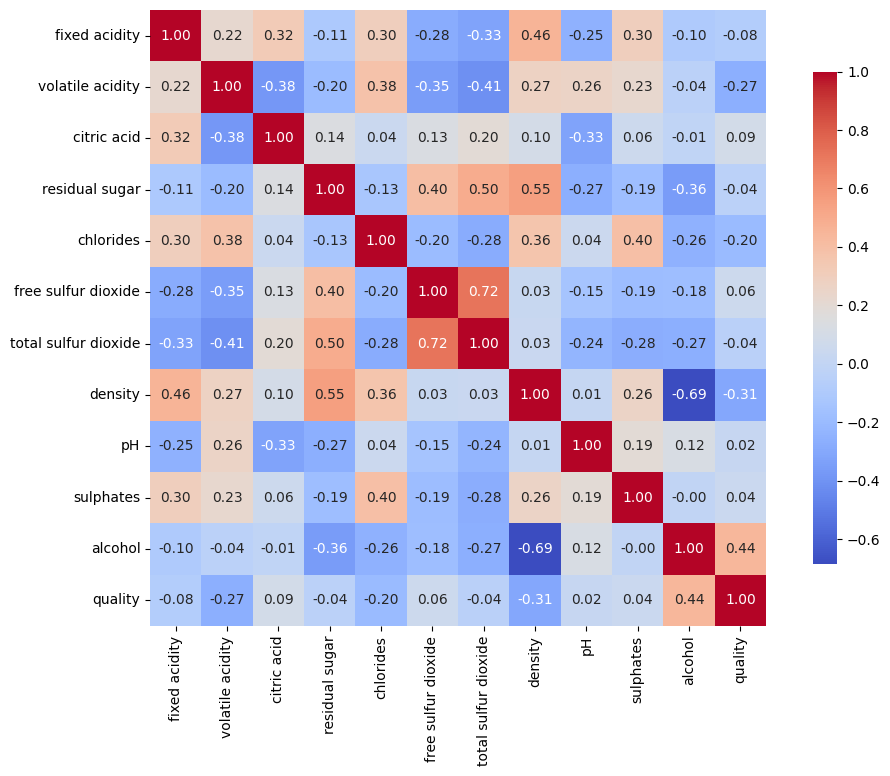

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_winquality_white_quality.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

In [31]:
## Multiplication des données par 10
df_winquality_white_quality = pd.concat([df_winquality_white_quality]*1000, ignore_index=True)


### Préparation des données 

In [32]:
Y = df_winquality_white_quality["quality"]
X = df_winquality_white_quality.drop(columns=["quality"])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape





((5197600, 11), (5197600,), (1299400, 11), (1299400,))

### Normalisation des données 

In [33]:
scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

### Entrainement des données 

In [34]:
# création du modèle de régression linéaire
model = LinearRegression()

# entraînement du modèle
model.fit(X_train_scaler, Y_train)

y_pred = model.predict(X_test_scaler)

### Evaluation du model 

In [35]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("MSE: ", mse , "R2: ", r2)

MSE:  0.5410188217448114 R2:  0.29261123051743343


In [36]:
# 5. Créer et entraîner le modèle Gradient Boosting
gbr = GradientBoostingRegressor(
    n_estimators=100,    # Nombre d'arbres
    learning_rate=0.1,   # Taux d'apprentissage
    max_depth=3,         # Profondeur max des arbres
    random_state=42
)

In [ ]:
# entraînement du modèle
gbr.fit(X_train_scaler, Y_train)

# 6. Faire des prédictions
y_pred = gbr.predict(X_test)

In [ ]:
# 7. Évaluer le modèle
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 4.5896
R² Score: -5.4208
